## Importing packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import wrangle
import json
import folium
import explore

## Acquiring the data

In [2]:
df = pd.read_csv('311_service_calls.csv')

## Preparing the data

In [3]:
df = wrangle.clean_311(df)

In [4]:
df.head()

,case_id,open_date,due_date,closed_date,is_late,dept,call_reason,case_type,case_status,source_id,...,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,zipcode
2497,1014281655,2018-02-28,2018-07-09,2020-06-06,YES,Code Enforcement Services,code,Certificates of Occupancy,Closed,Internal Services Requests,...,0,0,0,0,1,0,0,0,0,78251
2498,1014281665,2018-02-28,2018-07-09,2020-06-06,YES,Code Enforcement Services,code,Zoning: District Requirement,Closed,Internal Services Requests,...,0,0,0,0,1,0,0,0,0,78251
2499,1014281677,2018-02-28,2018-07-09,2020-06-06,YES,Code Enforcement Services,code,Certificates of Occupancy,Closed,Internal Services Requests,...,0,0,0,0,1,0,0,0,0,78251
2556,1014300321,2018-03-06,2020-09-24,2020-05-18,NO,Development Services,buildings,Street Light Existing Res Sub Div,Closed,Constituent Call,...,0,0,1,0,0,0,0,0,0,78211
2657,1014326068,2018-03-14,2018-07-23,2020-05-27,YES,Code Enforcement Services,code,Zoning: District Requirement,Closed,Internal Services Requests,...,0,0,1,0,0,0,0,0,0,11800


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 428870 entries, 2497 to 495432
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   case_id                   428870 non-null  int64         
 1   open_date                 428870 non-null  datetime64[ns]
 2   due_date                  428870 non-null  datetime64[ns]
 3   closed_date               428870 non-null  datetime64[ns]
 4   is_late                   428870 non-null  object        
 5   dept                      428870 non-null  object        
 6   call_reason               428870 non-null  object        
 7   case_type                 428870 non-null  object        
 8   case_status               428870 non-null  object        
 9   source_id                 428870 non-null  object        
 10  address                   428870 non-null  object        
 11  council_district          428870 non-null  int64         
 12 

In [6]:
# This dataset is very thorough with nulls only around 10% for the dept column (nulls in CLOSEDDATETIME is just 
# indicative of an open case)

df.isna().sum()

case_id                         0
open_date                       0
due_date                        0
closed_date                     0
is_late                         0
dept                            0
call_reason                     0
case_type                       0
case_status                     0
source_id                       0
address                         0
council_district                0
longitude                       0
latitude                        0
days_open                       0
resolution_days_due             0
days_before_or_after_due        0
level_of_delay                  0
district_0                      0
district_1                      0
district_2                      0
district_3                      0
district_4                      0
district_5                      0
district_6                      0
district_7                      0
district_8                      0
district_9                      0
district_10                     0
zipcode       

In [7]:
# Roughly 1/5 of our cases came back late

df.groupby('is_late').case_id.count()

is_late
NO     371323
YES     57547
Name: case_id, dtype: int64

In [8]:
# Note that the CLOSEDDATETIME column has 54053 nulls which matches, probably safe to assume these cases are indeed
# still open

df.groupby('case_status').case_id.count()

case_status
Closed    428870
Name: case_id, dtype: int64

In [9]:
df.groupby('council_district').case_id.count()

council_district
0      2355
1     56484
2     56179
3     54990
4     40941
5     58460
6     36320
7     39597
8     24185
9     24009
10    35350
Name: case_id, dtype: int64

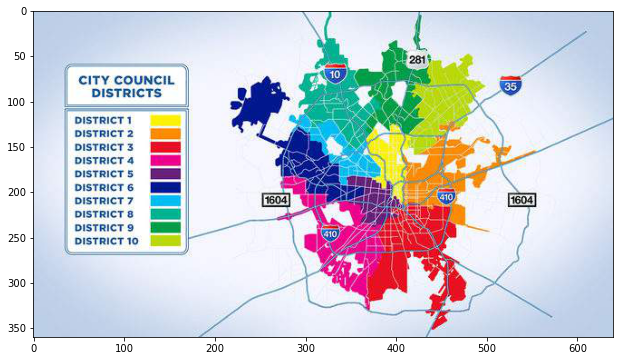

In [10]:
plt.subplots(figsize=(16, 6))
img = mpimg.imread('council_map.jpg')
imgplot = plt.imshow(img)
plt.show()

<AxesSubplot:xlabel='dept', ylabel='count'>

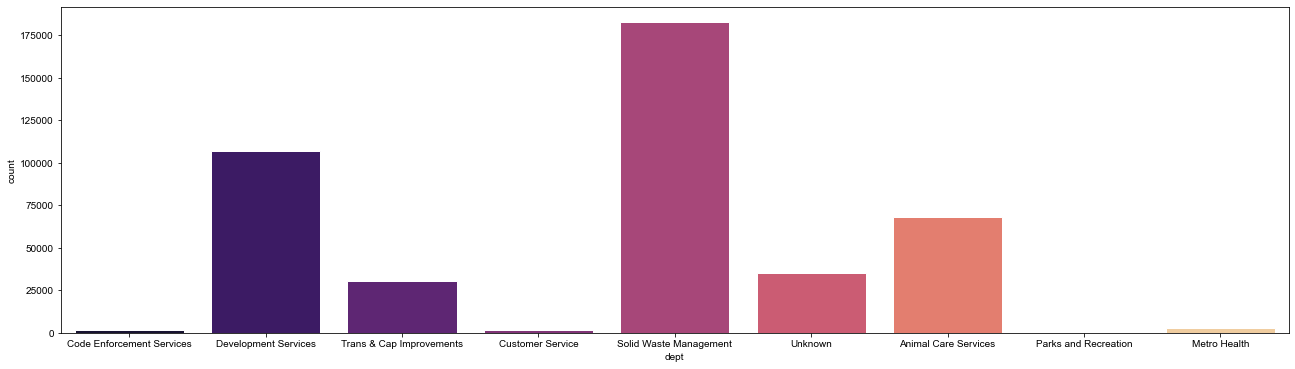

In [11]:
plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.countplot(data = df, x = 'dept', palette = "magma")

<AxesSubplot:xlabel='call_reason', ylabel='count'>

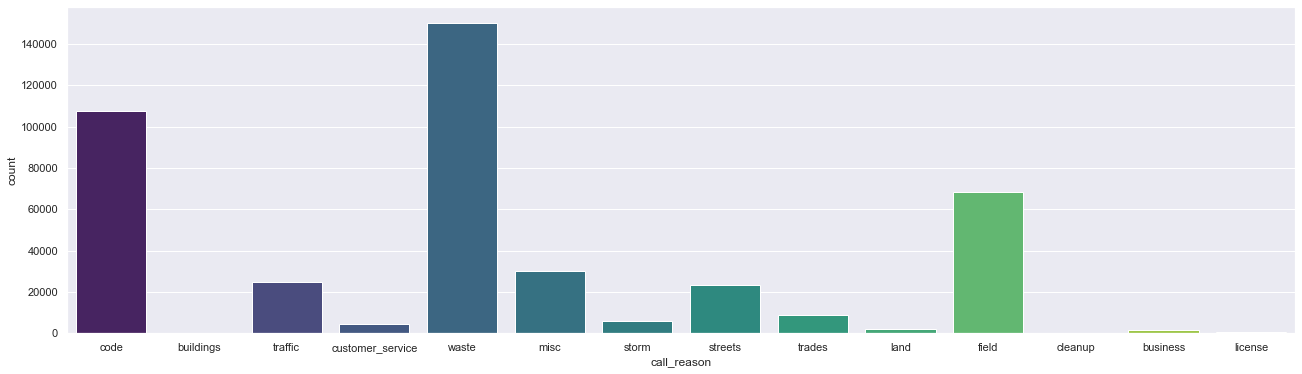

In [12]:
plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.countplot(data = df, x = 'call_reason', palette = "viridis")

## Explore

- Do different areas get better general service? 
- Are different departments/issues expected to take longer?
- Do different areas get better service depending on the department/issue?

In [13]:
train, validate, test = wrangle.split(df)
district_df = explore.create_district_df(train)
zip_df = explore.create_zip_df(train)
dept_df = explore.create_dept_df(train)
call_reason_df = explore.create_call_reason_df(train)

### Exploring by council district

<AxesSubplot:xlabel='council_district', ylabel='count'>

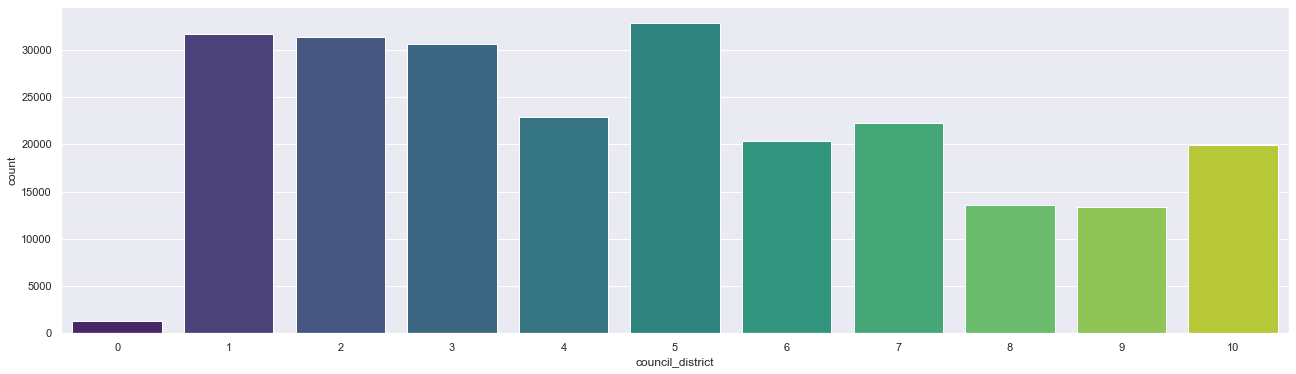

In [14]:
# Showing the counts of calls by district

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.countplot(data = train, x = 'council_district', palette = "viridis")

<AxesSubplot:xlabel='council_district', ylabel='days_before_or_after_due'>

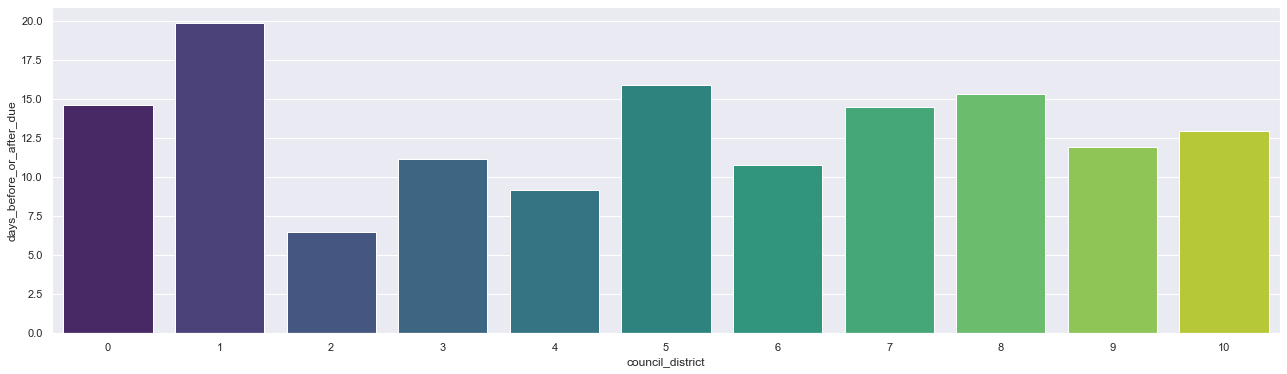

In [15]:
# Showing the days_before_or_after_due average by district

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.barplot(data = district_df, x = 'council_district', y = 'days_before_or_after_due', palette = "viridis")

<AxesSubplot:xlabel='council_district', ylabel='days_before_or_after_due_med'>

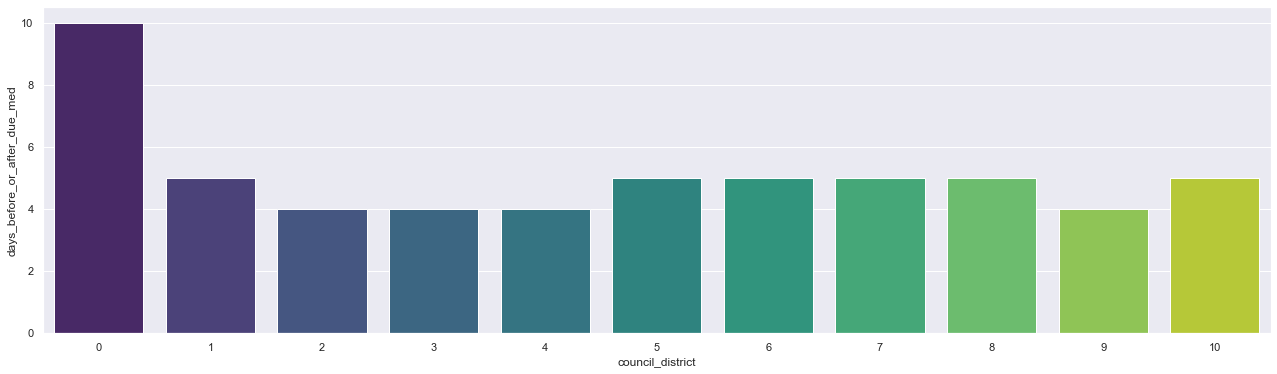

In [18]:
# Showing the days_before_or_after_due median by district, it would seem our data is heavily skewed to the right,
# let's confirm this

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.barplot(data = district_df, x = 'council_district', y = 'days_before_or_after_due_med', palette = "viridis")

In [49]:
bleh = pd.DataFrame(out)
bleh['add'] = 1
bleh.groupby('days_before_or_after_due').sum()

,add
days_before_or_after_due,
"(-699.001, -3.0]",37260
"(-3.0, 0.0]",37200
"(0.0, 1.0]",33734
"(1.0, 2.0]",46420
"(2.0, 3.0]",25463
"(3.0, 5.0]",63010
"(5.0, 6.0]",28556
"(6.0, 8.0]",15815
"(8.0, 29.0]",35973


In [51]:
(33734 + 46420 + 25463 + 63010 + 28556 + 15815 + 35973 + 37701 + 32676) / (37200 + 37260 + 33734 + 46420 + 25463 + 63010 + 28556 + 15815 + 35973 + 37701 + 32676 + 35062) 

0.74462657681815

In [53]:
df.groupby('zipcode').count()

,case_id,open_date,due_date,closed_date,is_late,dept,call_reason,case_type,case_status,source_id,...,district_1,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10
zipcode,,,,,,,,,,,,,,,,,,,,,
10000,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
10002,40,40,40,40,40,40,40,40,40,40,...,40,40,40,40,40,40,40,40,40,40
10003,29,29,29,29,29,29,29,29,29,29,...,29,29,29,29,29,29,29,29,29,29
10004,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
10005,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78261,21,21,21,21,21,21,21,21,21,21,...,21,21,21,21,21,21,21,21,21,21
78263,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
78264,40,40,40,40,40,40,40,40,40,40,...,40,40,40,40,40,40,40,40,40,40


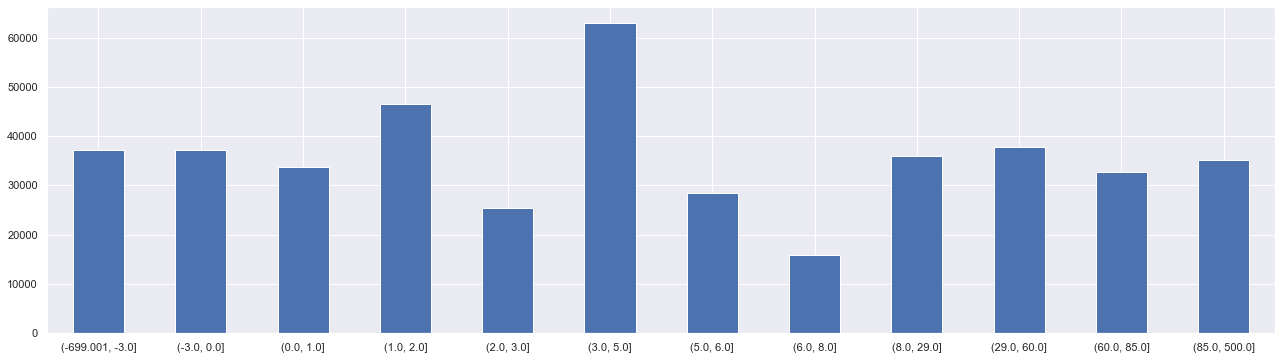

In [30]:
# Probably not the best plot but it is indeed skewed right, and with the current bins 

out = pd.qcut(df['days_before_or_after_due'], q=12)
ax = out.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(22,6))
plt.show()

<AxesSubplot:xlabel='council_district', ylabel='days_open'>

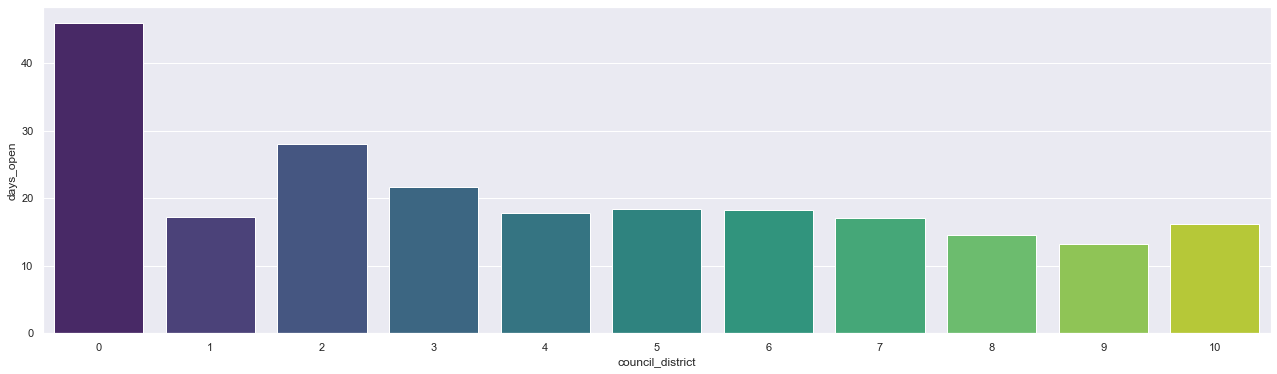

In [16]:
# Showing average days_open by district

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.barplot(data = district_df, x = 'council_district', y = 'days_open', palette = "viridis")

<AxesSubplot:xlabel='council_district', ylabel='days_open_med'>

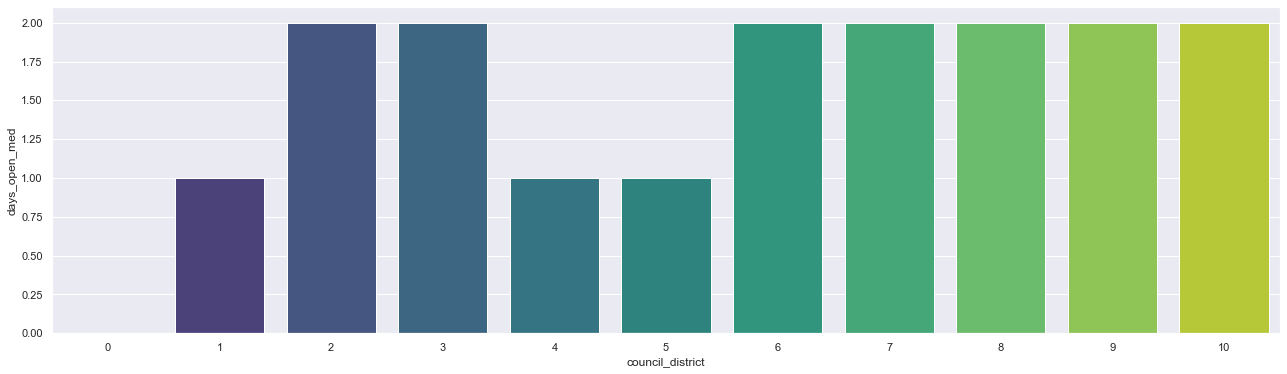

In [19]:
# Showing median days open by district

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.barplot(data = district_df, x = 'council_district', y = 'days_open_med', palette = "viridis")

### Exploring by dept

<AxesSubplot:xlabel='dept', ylabel='count'>

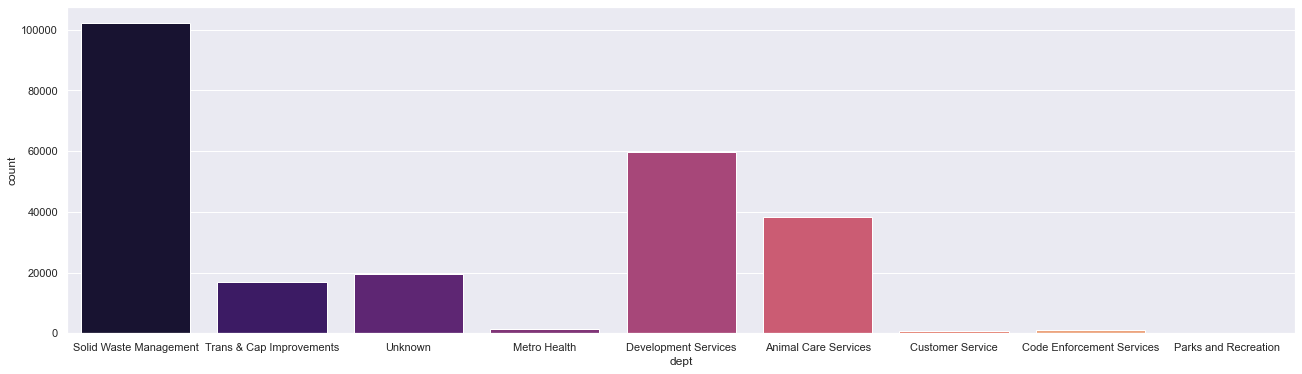

In [32]:
# Showing the counts of calls by dept, solid waste management is the most called on by far

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.countplot(data = train, x = 'dept', palette = "magma")

<AxesSubplot:xlabel='dept', ylabel='days_before_or_after_due'>

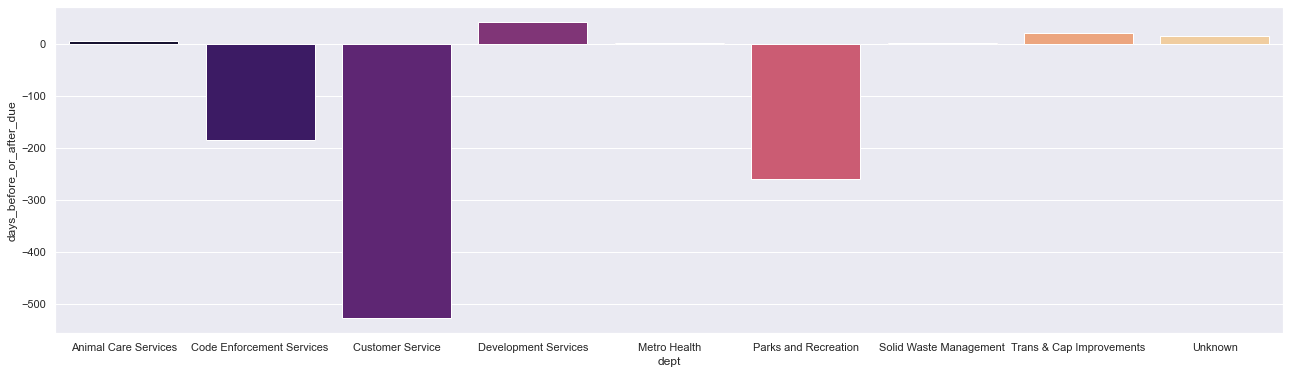

In [33]:
# Showing the days_before_or_after_due average by dept

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.barplot(data = dept_df, x = 'dept', y = 'days_before_or_after_due', palette = "magma")

<AxesSubplot:xlabel='dept', ylabel='days_before_or_after_due_med'>

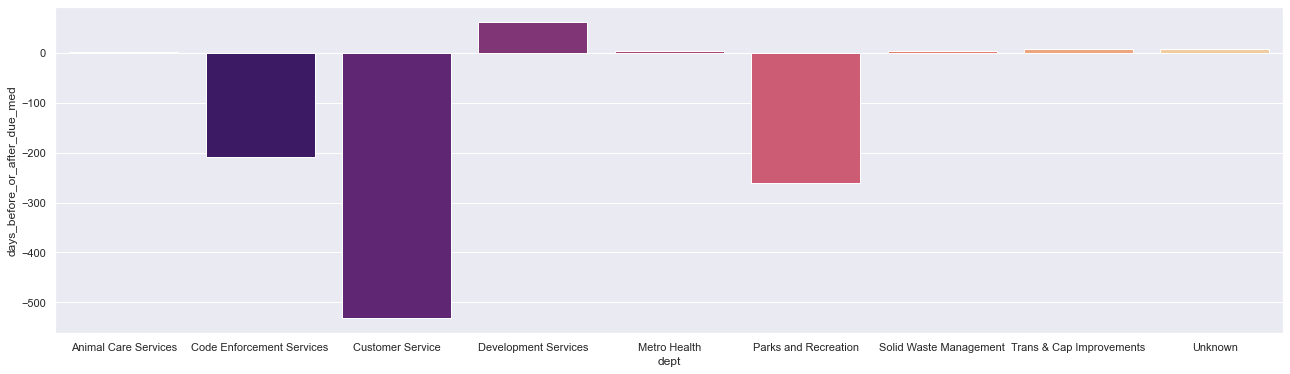

In [34]:
# Showing the days_before_or_after_due median by dept

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.barplot(data = dept_df, x = 'dept', y = 'days_before_or_after_due_med', palette = "magma")

<AxesSubplot:xlabel='dept', ylabel='days_open'>

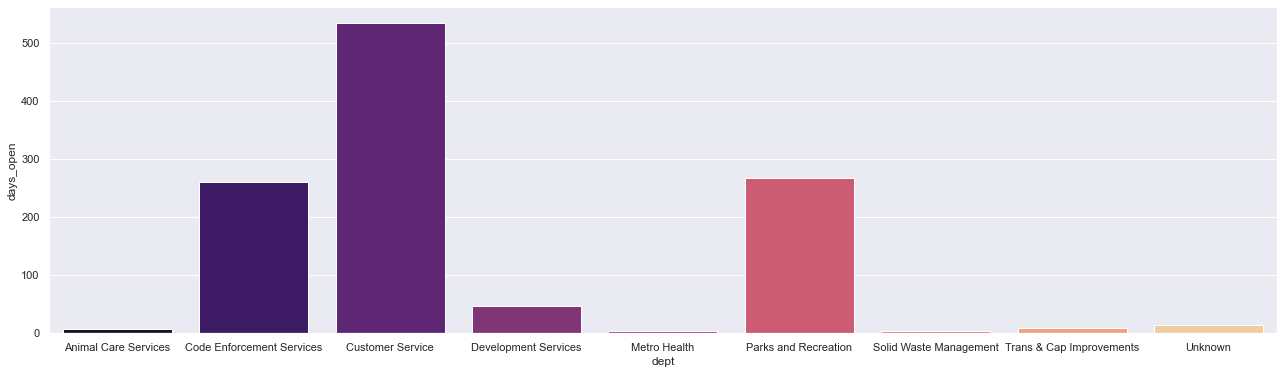

In [35]:
# Showing the days_open average by dept

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.barplot(data = dept_df, x = 'dept', y = 'days_open', palette = "magma")

<AxesSubplot:xlabel='dept', ylabel='days_open_med'>

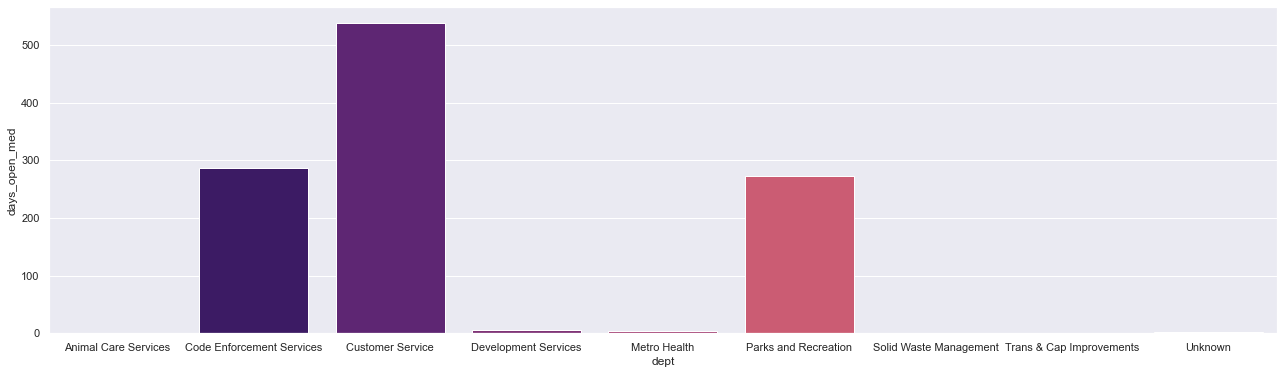

In [36]:
# Showing the days_open median by dept

plt.subplots(figsize=(22, 6))
sns.set_theme(style="darkgrid")
sns.barplot(data = dept_df, x = 'dept', y = 'days_open_med', palette = "magma")